# Python Visualisation Project on Zomato Dataset

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
%matplotlib inline

In [2]:
pd.options.display.max_colwidth = 100
plt.style.use("default")
pd.options.display.float_format = "{:,.2f}".format

## . Data Processing and Data Cleaning

In [3]:
df = pd.read_csv('zomato_restaurants_in_India.csv')

In [4]:
df=df.drop(['res_id','url','city_id','country_id','zipcode'],axis=1)

In [5]:
df['establishment'].replace("\\[|\\]","",regex=True,inplace=True)
df['establishment'].replace("\\'|\\'","",regex=True,inplace=True)

In [6]:
df = df[df.establishment!=""]

In [7]:
establishment = df['establishment'].value_counts()
establishment = establishment.sort_values(ascending= False, axis=0)

## . Establishment and it's Count

Text(0.5, 0, 'Count')

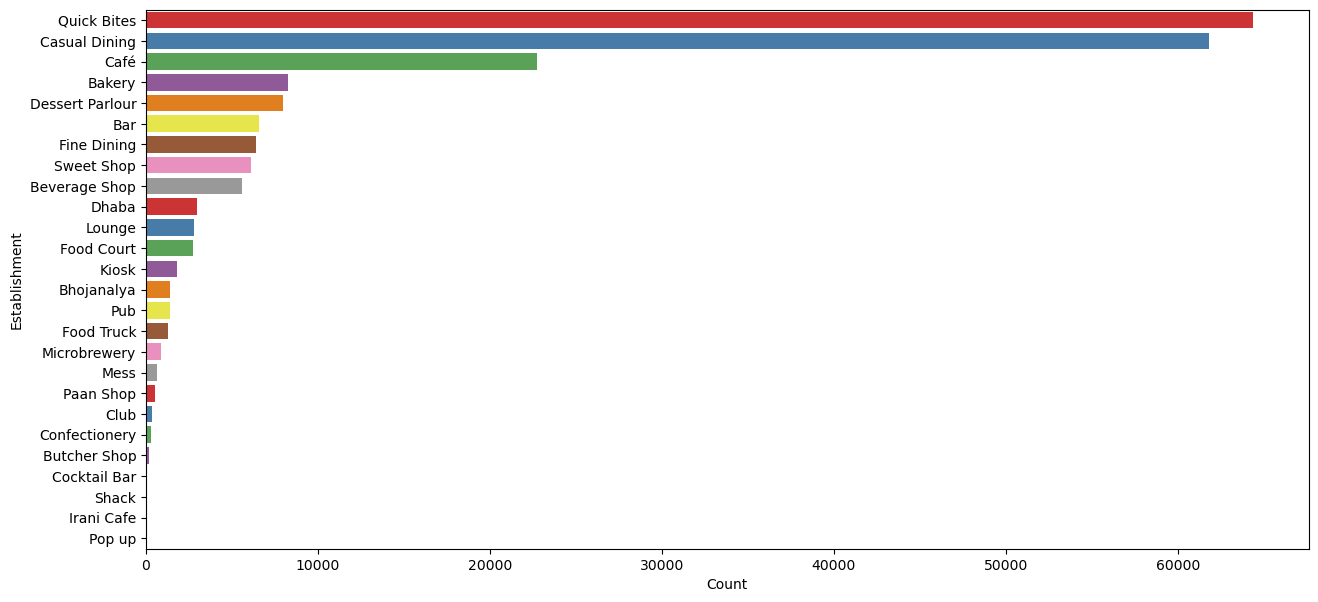

In [8]:
plt.figure(figsize=(15,7))

sns.barplot(y=establishment.index,x=establishment.values, palette='Set1')

plt.ylabel("Establishment")
plt.xlabel("Count")



## . Rating Text Percentage

In [9]:
rating_text2=pd.cut(df.aggregate_rating,[-0.001,1,2,3,4,5],labels=["Very Bad","Bad","Good","Very good","Excellent"])
rating_text2

0         Excellent
1         Excellent
2         Excellent
3         Excellent
4         Excellent
            ...    
211939    Excellent
211940    Excellent
211941    Very good
211942    Very good
211943    Very good
Name: aggregate_rating, Length: 207117, dtype: category
Categories (5, object): ['Very Bad' < 'Bad' < 'Good' < 'Very good' < 'Excellent']

In [10]:
rating_text3 = rating_text2.value_counts().sort_values(ascending=False,axis=0)
rating_text3

Very good    109559
Excellent     62962
Very Bad      22790
Good          11766
Bad              40
Name: aggregate_rating, dtype: int64

Text(0.5, 1.0, 'Percentage of Rating Text')

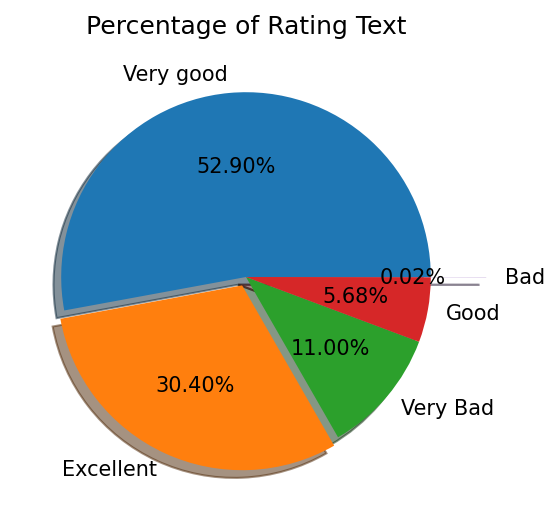

In [11]:
plt.figure(figsize=(4, 4), dpi=150)
rating_text3.plot.pie(autopct="%.2f%%",
              subplots=True,explode=[
                  0,
                  0.05,
                  0,0,0.3
              ],
              shadow=True)
plt.ylabel("")
plt.title("Percentage of Rating Text",)

## . Cuisines Type Count

In [12]:
df1=df.cuisines.dropna().copy()
df1=df1.str.cat(sep=', ')

(-0.5, 999.5, 499.5, -0.5)

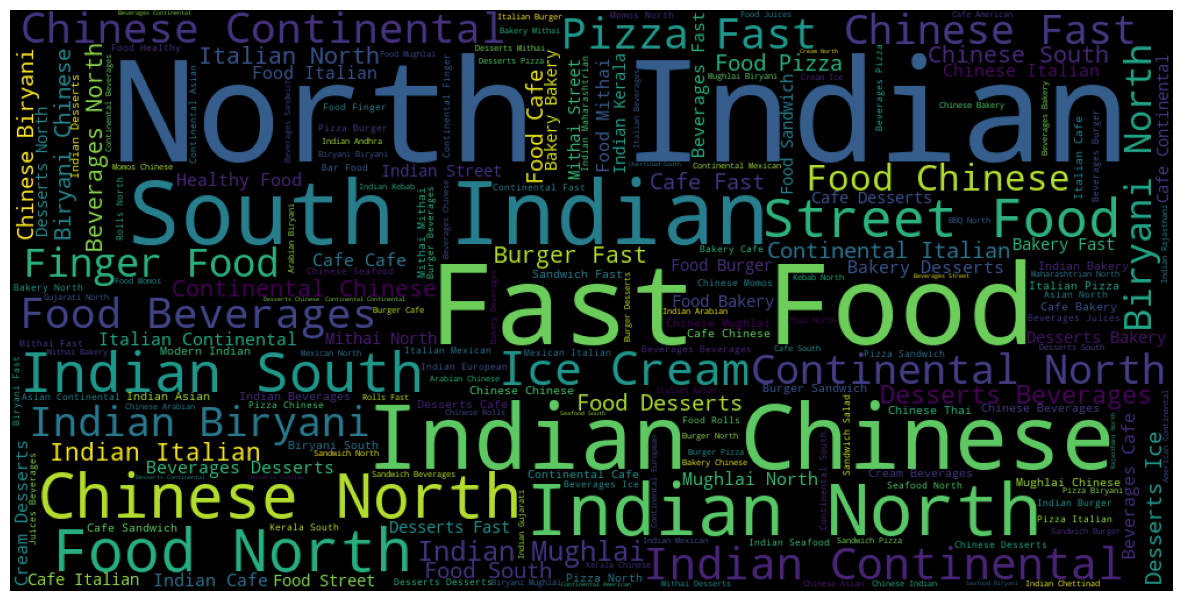

In [13]:
unique_string=(" ").join(df1.split(" "))
wordcloud = WordCloud(width = 1000, height = 500,max_words=200).generate(unique_string)
plt.figure(figsize=(15,8))
plt.imshow(wordcloud)
plt.axis("off")

In [14]:
def counterr(it):
    counts = {}
    for item in it:
        counts[item]=counts.get(item,0)+1
    return counts

In [15]:
df2=counterr(df1.split(", "))

In [16]:
df3 = pd.DataFrame(zip(df2.keys(),df2.values()),columns=['food_type','count'])
df3
df3=df3.sort_values(by="count",ascending=False)

Text(0.5, 1.0, 'Top 10 food types in Zomato')

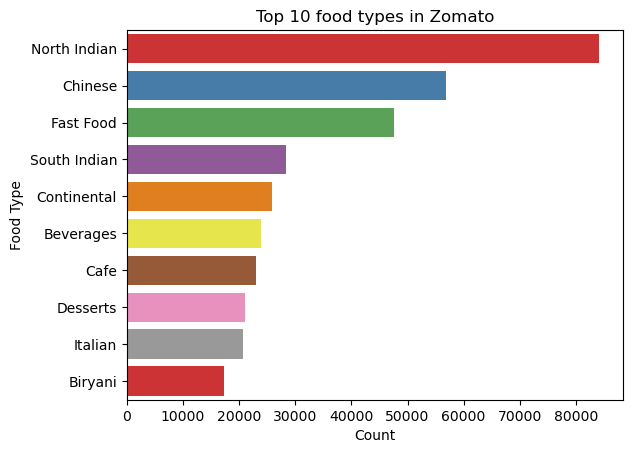

In [17]:
sns.barplot(data=df3.head(10),y="food_type",x="count",palette="Set1")
plt.xlabel("Count")
plt.ylabel("Food Type")
plt.title("Top 10 food types in Zomato")

In [18]:
df.highlights.replace("\\'|\\'","",regex=True,inplace=True)

## . Establishment Vs Votes

Text(0.5, 1.0, 'Establishment vs Votes')

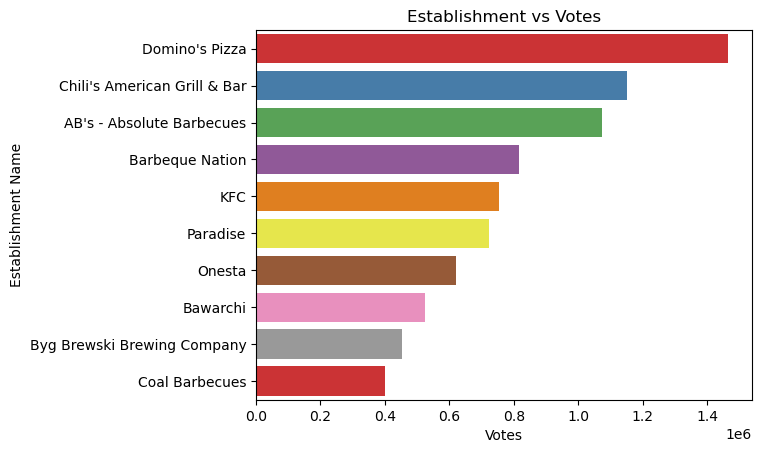

In [19]:

df3 = df.groupby("name").agg({"votes":np.sum}).sort_values(ascending=False,by="votes")
df4 = df3.head(10)

sns.barplot(y=df4.index,x=df4.votes,palette="Set1")

plt.ylabel("Establishment Name")
plt.xlabel("Votes")
plt.title("Establishment vs Votes")

## . Top 10 in costliest cities in India in terms of food valuation

Text(0.5, 1.0, 'Top 10 in costliest cities in India in terms of food valuation')

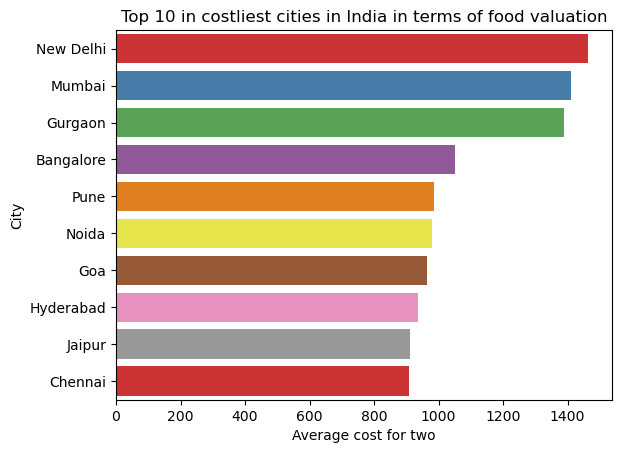

In [20]:
df5 = df.groupby("city").agg({"average_cost_for_two":np.average}).sort_values(ascending=False,by="average_cost_for_two")
df6 = df5.head(10)

sns.barplot(y=df6.index,x=df6['average_cost_for_two'],palette="Set1")

#plt.subplots_adjust(left=1,right=1,top=1)

plt.ylabel("City")
plt.xlabel("Average cost for two")
plt.title("Top 10 in costliest cities in India in terms of food valuation")

## . Top 10 in cheapest cities in India in terms of food valuation

Text(0.5, 1.0, 'Top 10 in cheapest cities in India in terms of food valuation')

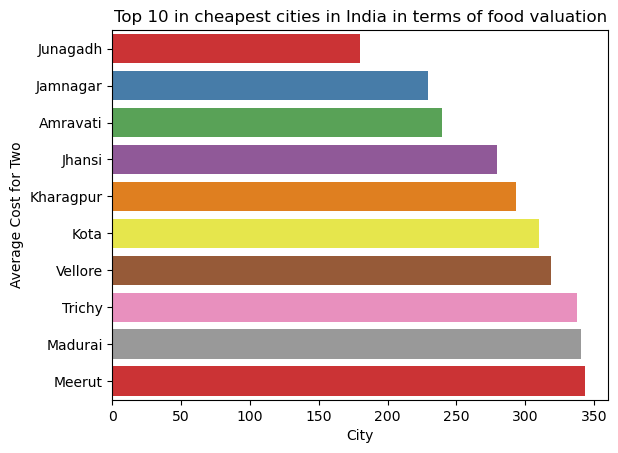

In [21]:
df7 = df.groupby("city").agg({"average_cost_for_two":np.average}).sort_values(ascending=True,by="average_cost_for_two")
df8 = df7.head(10)

sns.barplot(y=df8.index,x=df8['average_cost_for_two'],palette="Set1")

#plt.subplots_adjust(left=1,right=3,top=3)
plt.xlabel("City")
plt.ylabel("Average Cost for Two")
plt.title("Top 10 in cheapest cities in India in terms of food valuation")

## . Violin Plot Establishment vs Aggregate Rating

Text(0.5, 1.0, 'Rating Consistency of establishment')

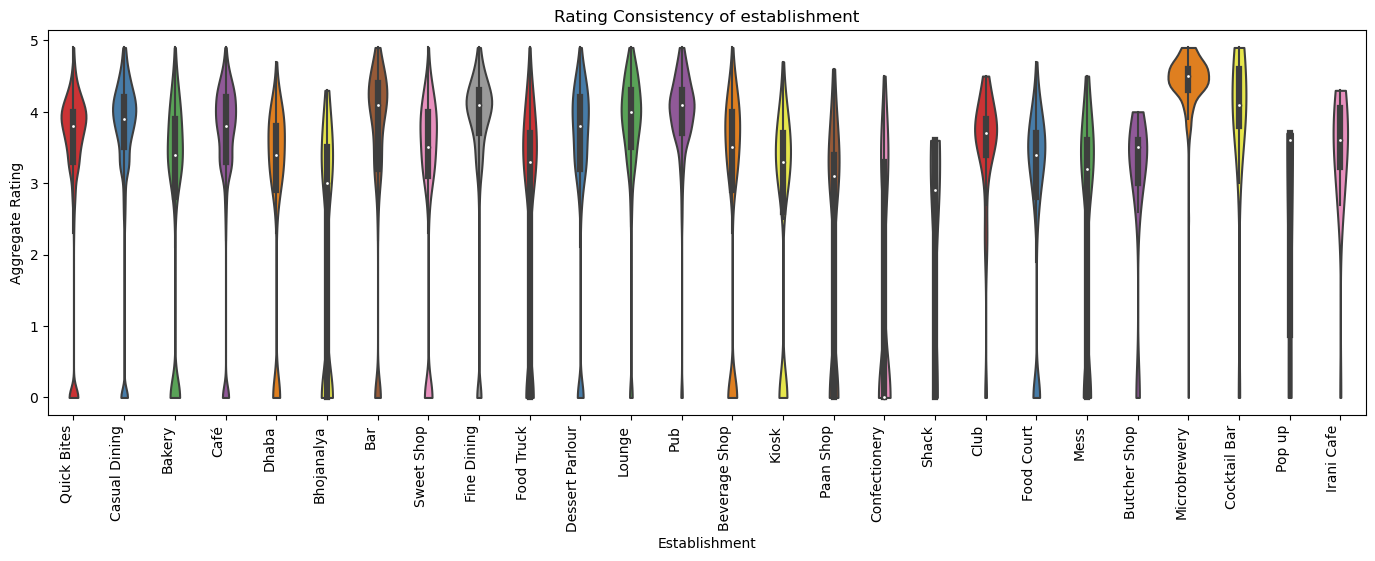

In [22]:
plt.figure(figsize=(17,5))
sns.violinplot(x="establishment",y="aggregate_rating",data=df,scale="area",cut=0,palette="Set1")
plt.xticks(rotation=90, horizontalalignment='right')
plt.xlabel("Establishment")
plt.ylabel("Aggregate Rating")
plt.title("Rating Consistency of establishment")

## . Photo Count Vs Votes with Respect to different Rating text

In [23]:
df['rating_text2']=rating_text2

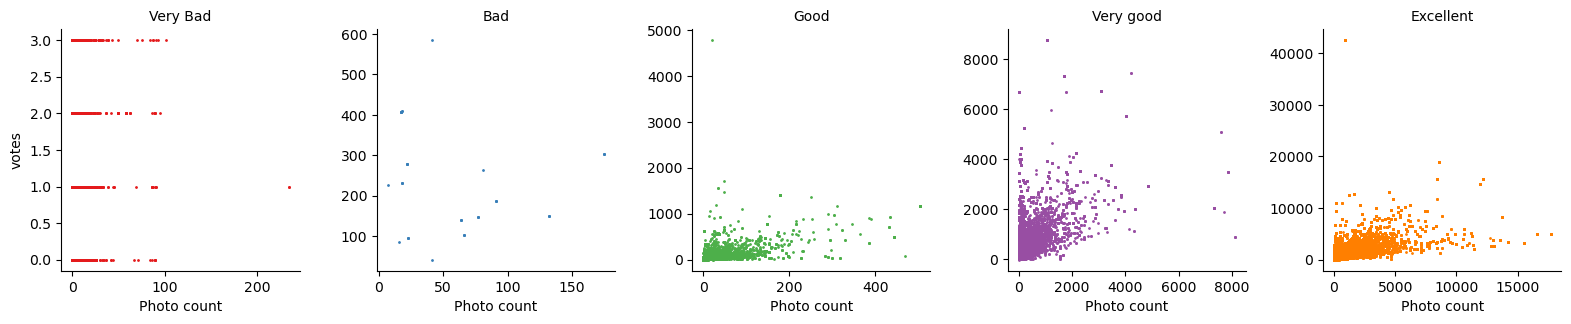

In [24]:
g=sns.FacetGrid(data=df,col="rating_text2",hue="rating_text2",palette="Set1",sharex=False,sharey=False)
g.map(plt.scatter,"photo_count","votes",s=1)
g.set_axis_labels("Photo count")
g.set_titles(col_template="{col_name}", row_template="{row_name}")
plt.subplots_adjust(left=1,right=2,top=1)

Text(0.5, 1.0, '')

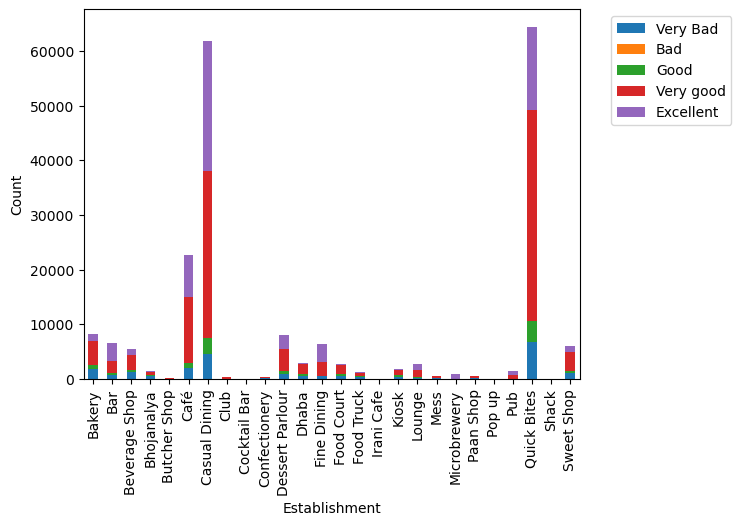

In [25]:
est = pd.crosstab(df.establishment,df.rating_text2)
est.plot(kind="bar",stacked=True)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.ylabel("Count")
plt.xlabel("Establishment")
plt.title("")

## . Transaction Methods

In [26]:
list1 = df.highlights.tolist()
words= str(list1).split()
s1= sum('Credit' in s for s in words)
s2= sum('Debit' in s for s in words)
s3=sum('Cash' in s for s in words)
s4=sum('Digital' in s for s in words)


In [27]:
newdata= pd.Series({'Credit Card':s1,'Debit Card':s2,'Cash':s3,'Digital':s4})

In [28]:
newdata

Credit Card    120945
Debit Card     113749
Cash           199080
Digital         56055
dtype: int64

Text(0.5, 1.0, 'Percentage of Transaction Methods')

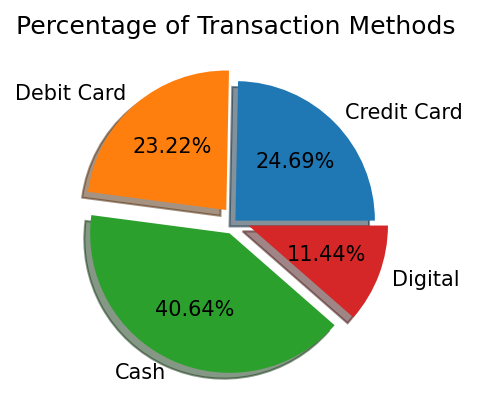

In [29]:
plt.figure(figsize=(3, 5), dpi=150)
newdata.plot.pie(autopct="%.2f%%",
              subplots=True, explode=[
                  0,
                  0.1,
                  0.1,
                  0.1
              ],
              shadow=True)
plt.ylabel("")
plt.title("Percentage of Transaction Methods")

## . Correlation between Votes , Photo Count and Average Cost For two 

(array([0.5, 1.5, 2.5]),
 [Text(0, 0.5, 'Votes'),
  Text(0, 1.5, 'Photo Count'),
  Text(0, 2.5, 'Average Cost For Two')])

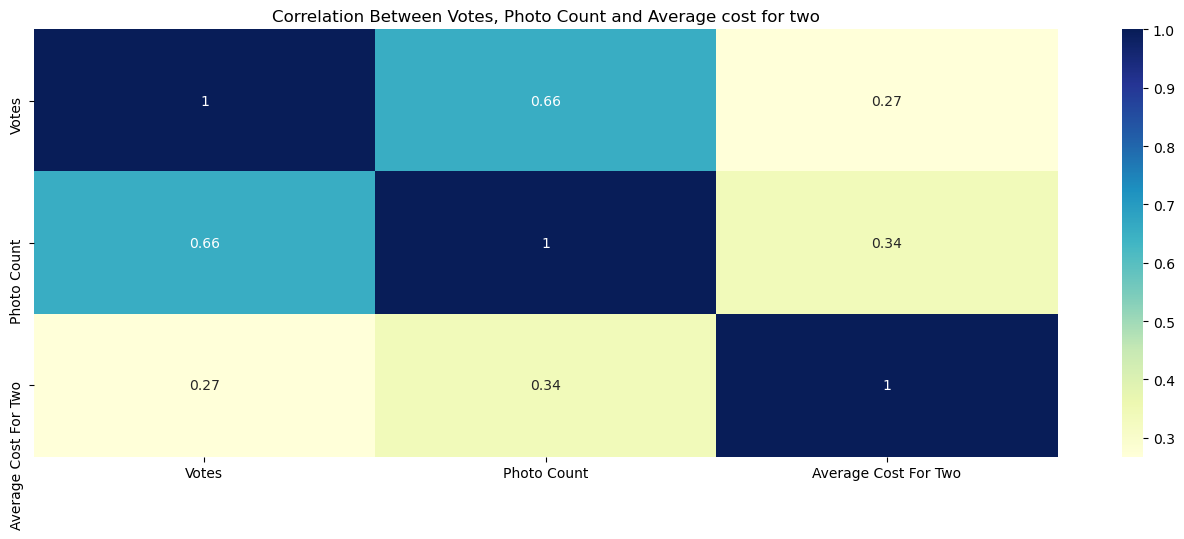

In [30]:
nc= df.filter(['votes','photo_count','average_cost_for_two'],axis=1) 
nc.columns = ['Votes','Photo Count','Average Cost For Two']
cor = nc.corr()
sns.heatmap(cor,xticklabels=cor.columns.values,
           yticklabels=cor.columns.values,annot=True,cmap="YlGnBu")
plt.title("Correlation Between Votes, Photo Count and Average cost for two")
plt.subplots_adjust(left=1,right=3,top=1)
plt.yticks(rotation=90)

## . Density and Box plot of Votes, Average Cost for Two and Aggregate Rating

In [ ]:
fig = plt.figure(figsize=(14,10))

ax1 = fig.add_subplot(3,2,1)
ax2 = fig.add_subplot(3,2,2)
sns.distplot(df['votes'],ax=ax1)
ax1.set_xlabel("Votes")
sns.boxplot(df['votes'],ax=ax2)
ax2.set_xlabel("Votes")

ax3 = fig.add_subplot(3,2,3)
ax4 = fig.add_subplot(3,2,4)
sns.distplot(df['average_cost_for_two'],ax=ax3)
ax3.set_xlabel("Average Cost for Two")
sns.boxplot(df['average_cost_for_two'],ax=ax4)
ax4.set_xlabel("Average Cost for Two")

ax5 = fig.add_subplot(3,2,5)
ax6 = fig.add_subplot(3,2,6)
sns.distplot(df['aggregate_rating'],ax=ax5)
ax5.set_xlabel("Aggregate Rating")
sns.boxplot(df['aggregate_rating'],ax=ax6)
ax6.set_xlabel("Aggregate Rating")

C:\Users\USER\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\USER\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\USER\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warn

## . Top 15 locations with most food chains enlisted to Zomato

In [ ]:
local = pd.DataFrame((df.locality +"("+ df.city +")").value_counts(),columns=["Count"])

In [ ]:
locs=local.head(15)

In [ ]:
locs

In [ ]:
sns.barplot(y=locs.index,x= locs.Count,palette="Set1")
plt.ylabel("Locality")
plt.xlabel("Count")
plt.title("Top 15 locations with most food chains registered to Zomato")
plt.subplots_adjust(left=1,right=2,top=1)